## Logistic regression

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors
from sklearn import linear_model, preprocessing

%matplotlib inline

In [30]:
# Admission data: 
# exam 1 score (x1) 
# exam 2 score (x2)
# admitted (y)
data = np.loadtxt('data/ml-ex2/ex2data1.txt', delimiter=',')

In [31]:
# Separate features (X) from target (y)
X, y = np.hsplit(data, np.array([2]))

In [32]:
# Logistic regression estimator requires an y row vector
y = y.ravel()

In [33]:
# Use 'lbfgs' solver for logistic regression as this is what Octave fminunc does
clf = linear_model.LogisticRegression(solver='lbfgs')
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
theta0 = clf.intercept_[0]
theta1 = clf.coef_[0,0]
theta2 = clf.coef_[0,1]

In [35]:
# Computes x2 from x1 and model parameters
def x2(x1):
    return (0.5 - theta0 - theta1*x1) / theta2

In [36]:
x1_min = X[:,0].min()
x1_max = X[:,0].max()

In [37]:
x1_plot = np.array([x1_min, x1_max])
x2_plot = np.vectorize(x2)(x1_plot)

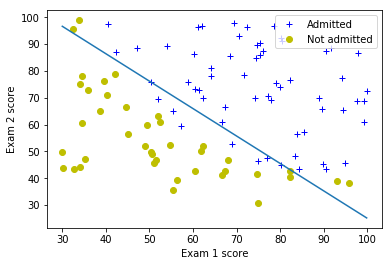

In [38]:
fig, ax = plt.subplots()

# Mask for selecting positive and negative samples
y_pos = y == 1
y_neg = y == 0

# Plot samples and decision boundary
ax.plot(X[y_pos,0], X[y_pos,1], 'b+', label='Admitted')
ax.plot(X[y_neg,0], X[y_neg,1], 'yo', label='Not admitted')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.legend(loc='upper right')

# Plot decision boundary
ax.plot(x1_plot, x2_plot)

In [39]:
X_test = np.array([
    [45., 85.],
    [50., 50.],
    [80., 80.]
])

In [40]:
clf.predict(X_test)

array([ 1.,  0.,  1.])

In [41]:
clf.predict_proba(X_test)

array([[  2.24714395e-01,   7.75285605e-01],
       [  9.91467107e-01,   8.53289280e-03],
       [  5.97054964e-04,   9.99402945e-01]])

In [42]:
theta0 = clf.intercept_[0]
theta1 = clf.coef_[0,0]
theta2 = clf.coef_[0,1]

In [43]:
theta0, theta1, theta2

(-25.052193143127443, 0.20535491218577978, 0.20058380395530143)

In [44]:
# Training accuracy
clf.score(X, y)

0.89000000000000001

## Regularized logistic regression

In [45]:
# Microchip test: 
# test 1 (x1) 
# test 2 (x2)
# accepted=1, rejected=0 (y)
data = np.loadtxt('data/ml-ex2/ex2data2.txt', delimiter=',')

In [46]:
# Separate features (X_raw) from target (y)
X_raw, y = np.hsplit(data, np.array([2]))

In [47]:
# Preprocessor to include polynomial features up to degree 6
poly = preprocessing.PolynomialFeatures(6, include_bias=False)

# Create polynomial feature matrix X
X = poly.fit_transform(X_raw)

In [48]:
# Logistic regression estimator requires an y row vector
y = y.ravel()

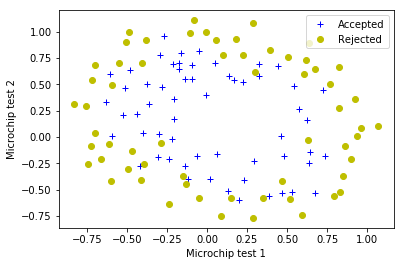

In [49]:
fig, ax = plt.subplots()

# Mask for selecting positive and negative samples
y_pos = y == 1
y_neg = y == 0

# Plot samples
ax.plot(X_raw[y_pos,0], X_raw[y_pos,1], 'b+', label='Accepted')
ax.plot(X_raw[y_neg,0], X_raw[y_neg,1], 'yo', label='Rejected')
ax.set_xlabel('Microchip test 1')
ax.set_ylabel('Microchip test 2')
ax.legend(loc='upper right')



In [50]:
# Train a logistic regression classifier
# C = 1.0  good fit
# C = 1e4  overfit (to little regularization)
# C = 1e-2 underfit (to much regularization)
clf = linear_model.LogisticRegression(C=1.0, solver='lbfgs')
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
# Training accuracy
clf.score(X, y)

0.83050847457627119

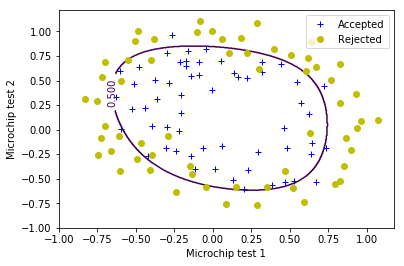

In [52]:
# Compute acceptance probabilities contour data
grid = np.mgrid[-1:1:500j, -1:1:500j]

X_grid = np.c_[grid[0].ravel(), grid[1].ravel()]
X_grid_poly = poly.fit_transform(X_grid)
y_grid = clf.predict(X_grid_poly).reshape(grid[0].shape)

# Plot decision boundary on previous figure
cs = ax.contour(grid[0], grid[1], y_grid, levels=[0.5])
ax.clabel(cs)

# Show previous figure with decision boundary
fig